인명 Histogram
====

코퍼스로부터 인명을 추출하고 각종 히스토그램을 그려 본다.

In [1]:
from __future__ import unicode_literals
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# JSON 문서(train/dev)를 읽어들인다.

import json

dev_json = json.load(open('../data/distribution2016/dev.json'))
train_json = json.load(open('../data/distribution2016/train.json'))

JSON에서 개체명(NE)를 추출하여 인명(카테고리(type)가 'PS'인 것)만 추출하여 아래 빈도를 센다.
* 형태소의 갯수
* 형태소의 음절 길이
    - 예: '차범근'의 경우 3, '거스 히딩크'의 경우 2+3
* 품사 태그 열
    - 예: NNP, NNP+NNP
* 첫번째 음절

In [3]:
from collections import Counter

morp_num_cnt = Counter()    # 형태소 갯수
lemma_len_cnt = Counter()    # 형태소의 음절 길이
tag_cnt = Counter()    # 품사 태그 열
first_char_cnt = Counter()    # 첫번째 음절

for sentence in train_json['sentence']:
    morps = sentence['morp']
    for ne in sentence['NE']:
        if ne['type'] != 'PS':    # 인명만 추출
            continue
        begin = ne['begin']
        end = ne['end']
        morp_num_cnt[end - begin + 1] += 1
        lemma_len = '+'.join([str(len(_['lemma'])) for _ in morps[begin:end+1]])
        lemma_len_cnt[lemma_len] += 1
        tag = '+'.join([_['type'] for _ in morps[begin:end+1]])
        tag_cnt[tag] += 1
        first_char_cnt[morps[begin]['lemma'][0]] += 1

In [4]:
import platform

def plot_histogram(cnt, label, min_freq=10):
    """
    plot histogram with Counter object
    :param  cnt:       Counter object
    :param  label:     x label
    :param  min_freq:  minimum frequency
    """
    items = [(key, val) for key, val in cnt.items() if val >= min_freq]
    df = pd.DataFrame.from_dict({label: [key for key, _ in items], 'freq': [val for _, val in items]})
    print(df.head(10))
    fig = plt.figure()
    fig.set_figwidth(15)
    fig.set_figheight(10)
    sns.barplot(x=label, y='freq', data=df)
    if platform.system() == 'Darwin':
        plt.rc('font', family='AppleGothic')
    else:
        plt.rc('font', family='Baekmuk Dotum')
    plt.show()

형태소 갯수
----

   freq  num
0  2055    1
1   257    2
2    25    3


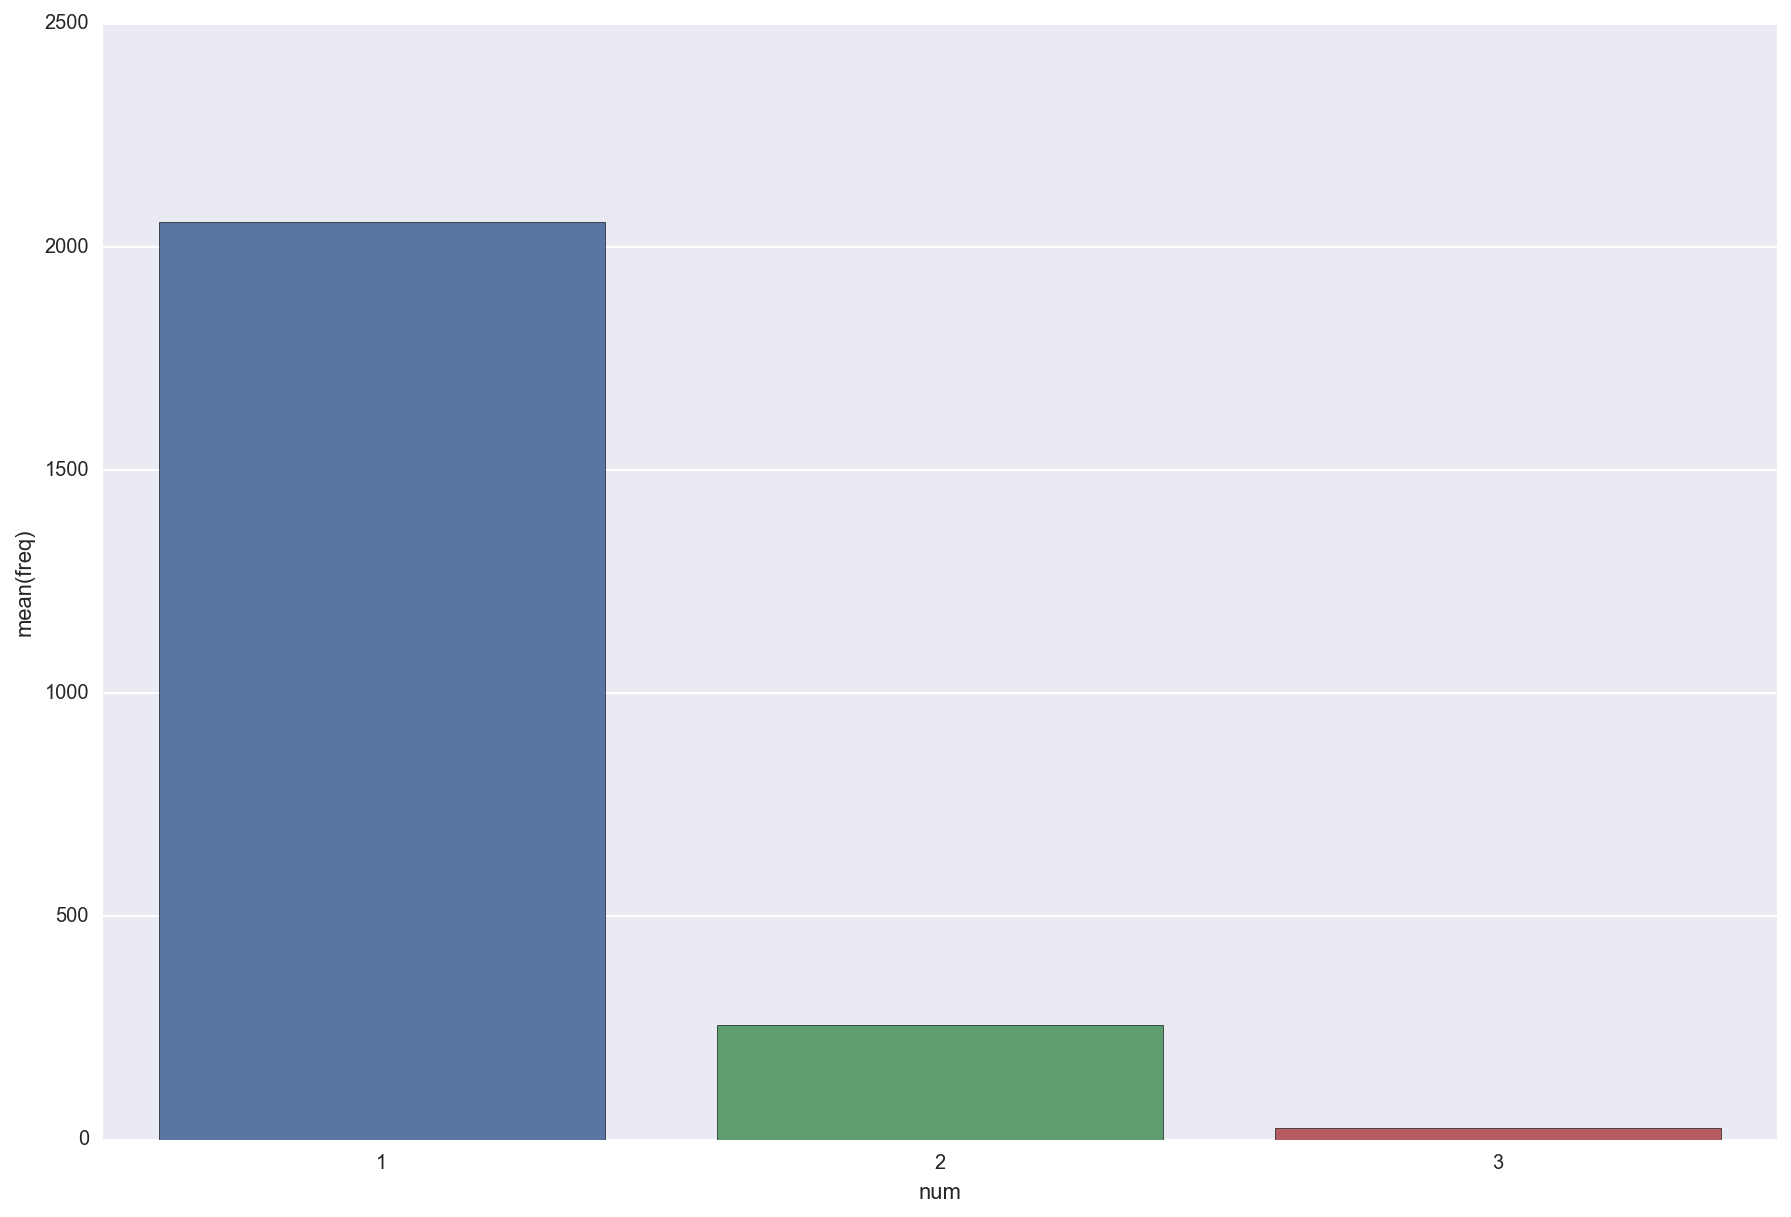

In [5]:
plot_histogram(morp_num_cnt, 'num')

음절 길이
----

   freq  len
0   203    1
1  1507    3
2   262    2
3    13    5
4    62    4
5    16  2+1
6    35  2+2
7    25  2+3
8    11  4+3
9    19  1+3


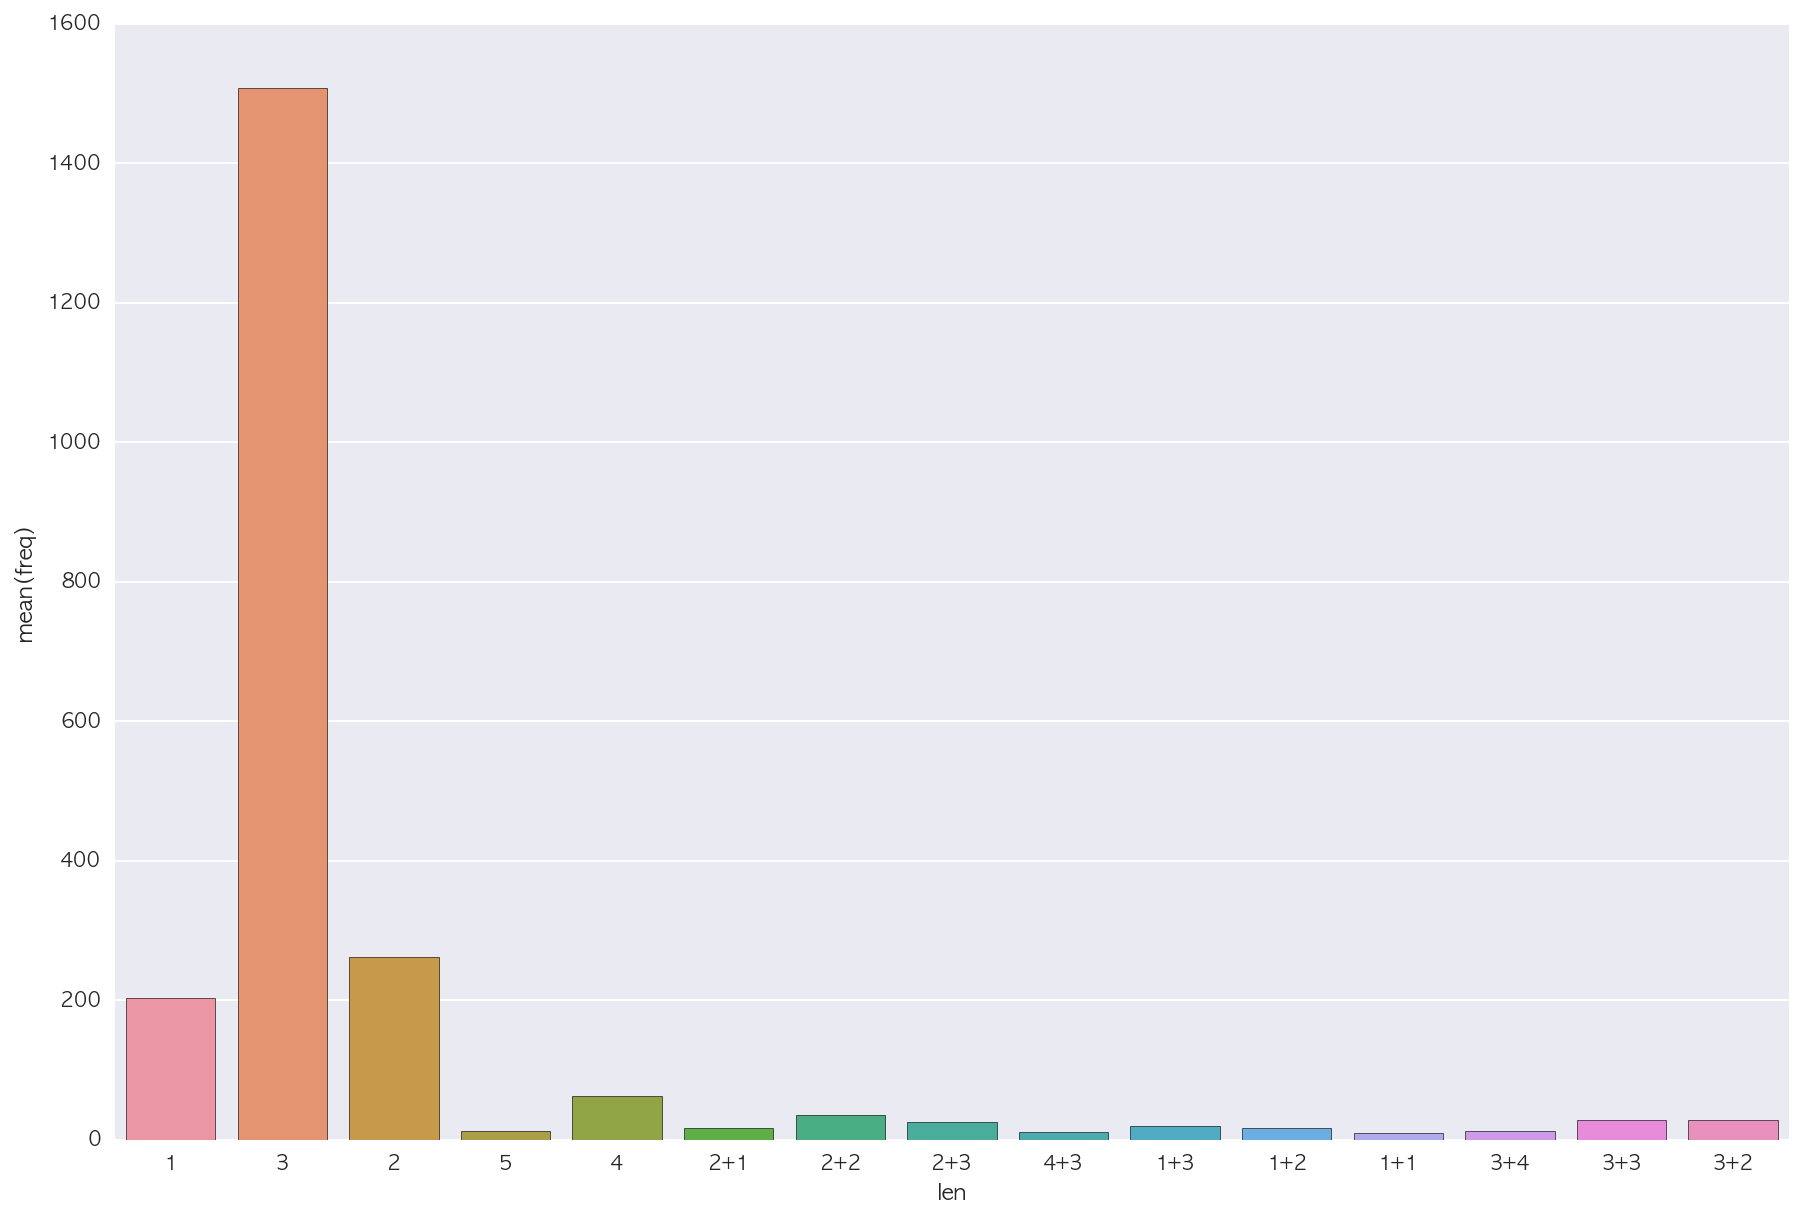

In [6]:
plot_histogram(lemma_len_cnt, 'len')

품사 태그
----

   freq      tag
0    16  NNG+NNP
1    31  NNG+NNG
2   138      NNG
3  1880      NNP
4    11    SL+SL
5    20  NNP+NNG
6    15       MM
7   157  NNP+NNP


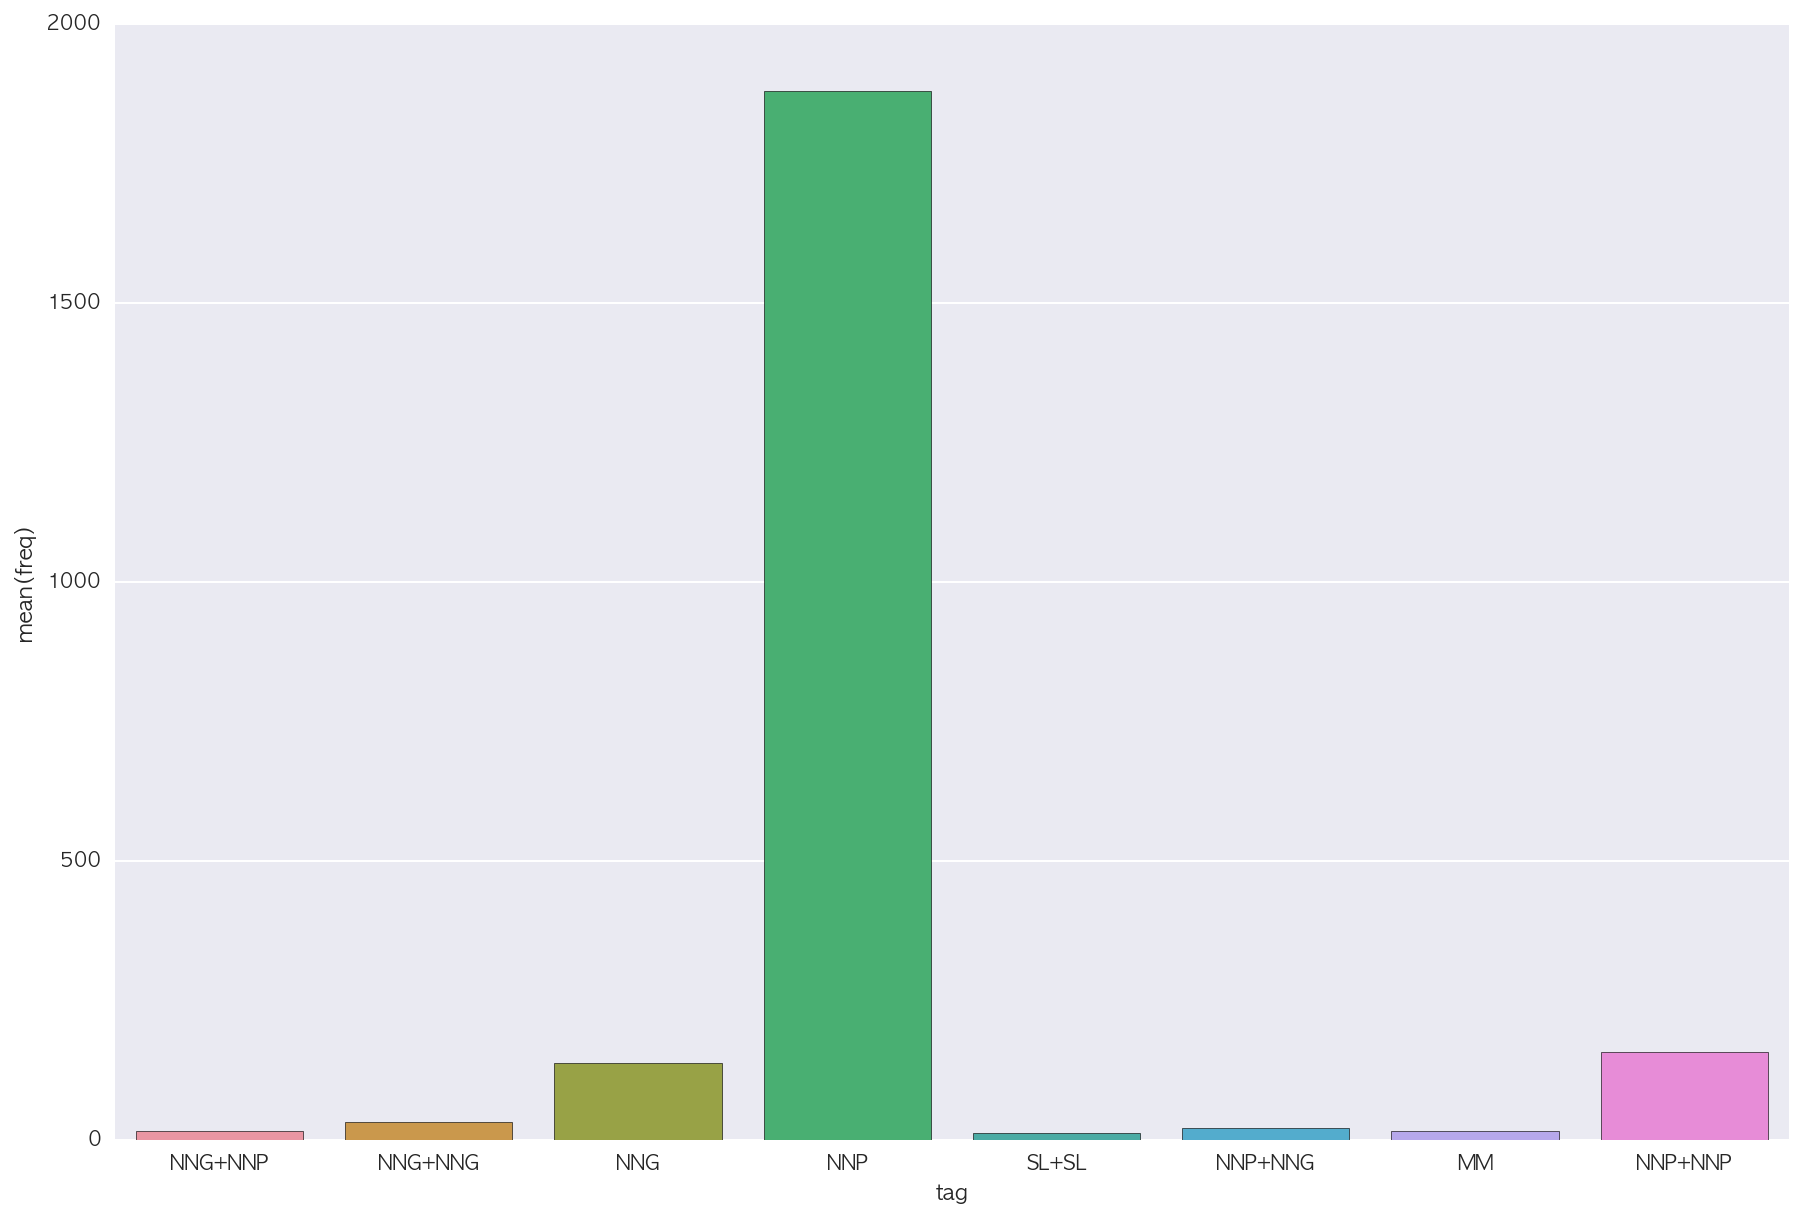

In [7]:
plot_histogram(tag_cnt, 'tag')

첫번째 음절
----

  first_char  freq
0          가    13
1          전    19
2          양    15
3          송    27
4          백    17
5          장    41
6          오    54
7          배    13
8          김   318
9          로    11


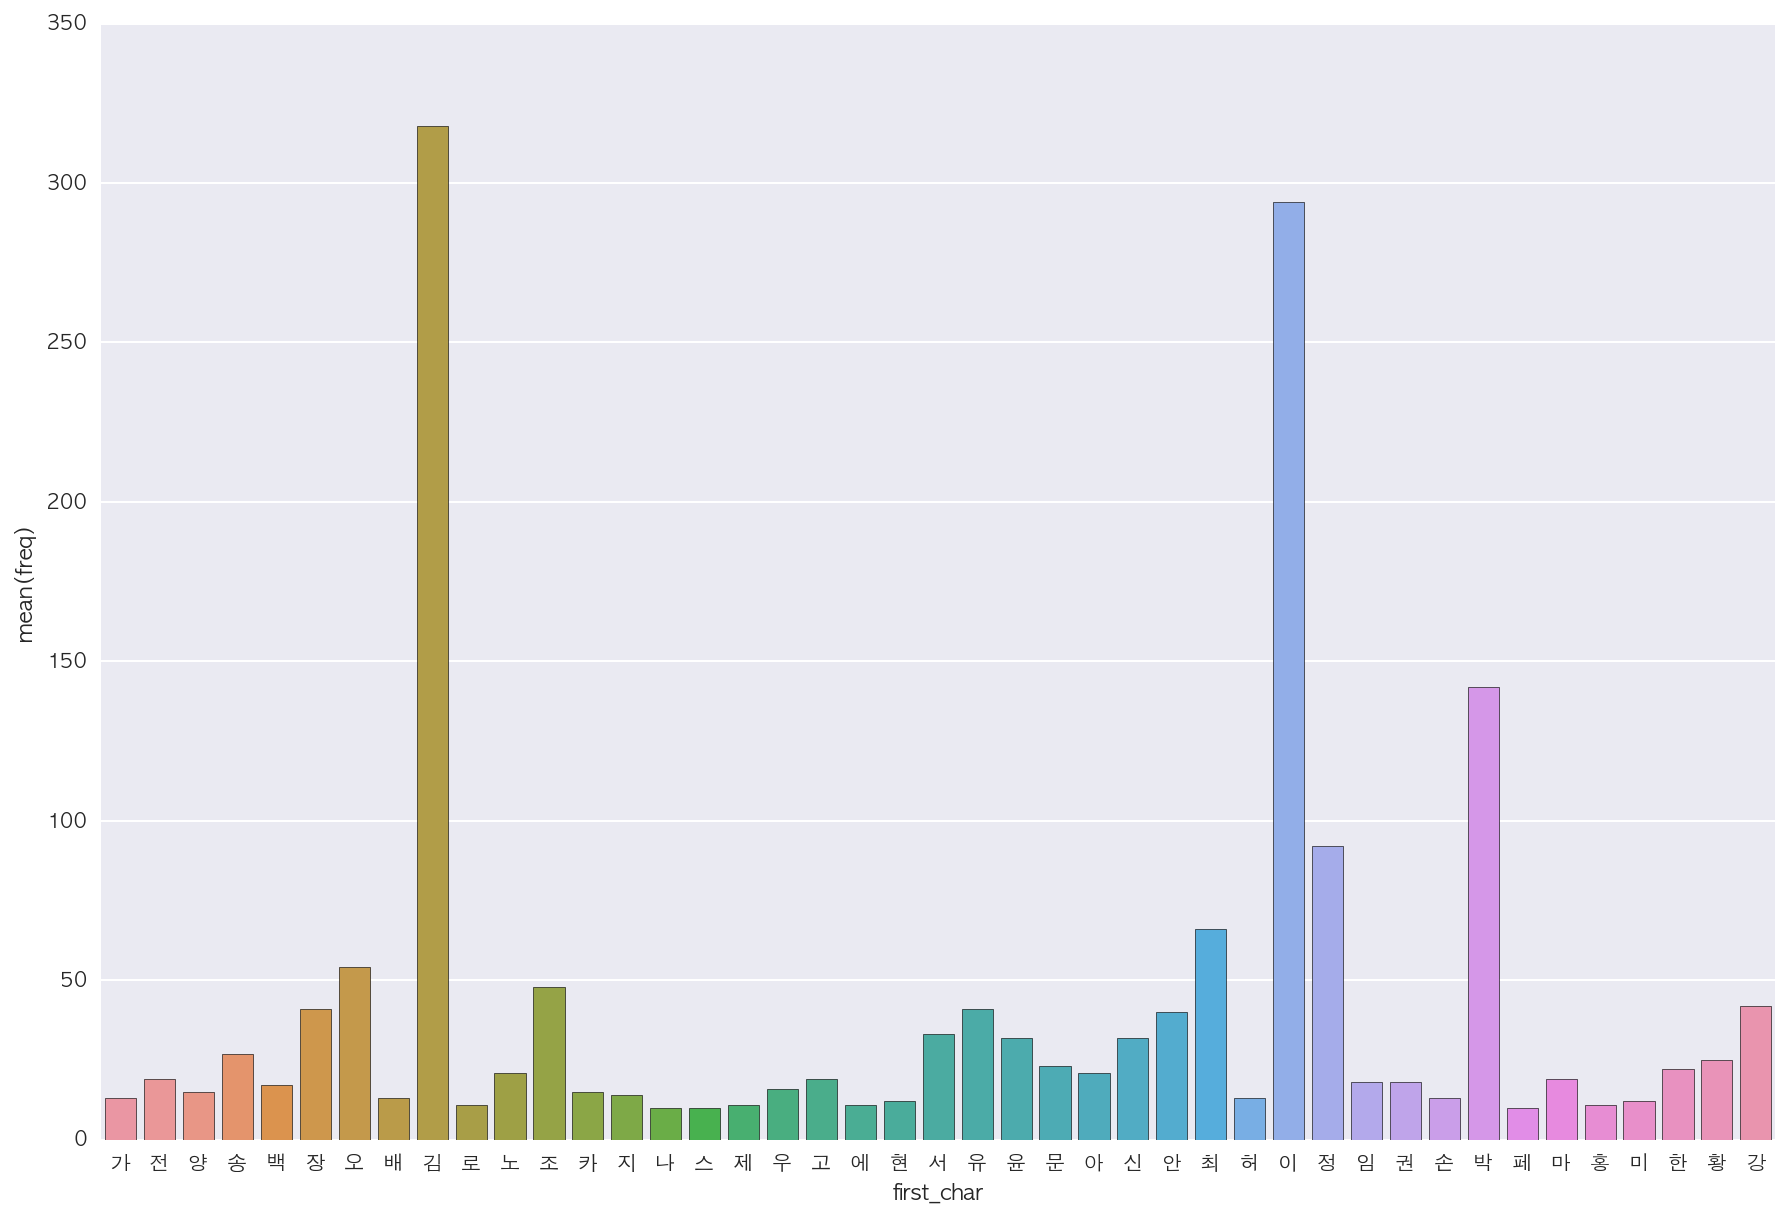

In [8]:
plot_histogram(first_char_cnt, 'first_char')

결론
----

1) 단일 형태소로, 2) 품사가 NNP 혹은 NNG이며, 3) 2~3음절인 인명에 대해 좀더 알아보자.